<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression exercise

We're going to use another house price example, this time from Sacramento.

### 1 - Use the filepath below to read in your DataFrame

In [1]:
house_prices_csv = '../assets/data/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv(house_prices_csv)

print(df.shape)

df.head()

(985, 12)


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2 - Conduct exploratory data analysis on this data set.

Report any notable findings here and any steps you take to clean/process data.

    Note: These EDA checks should be done on every data set we give you, as it will be the first thing you do on a new dataset in the real world.

In [3]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [4]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [5]:
# what are values of "type"?
df["type"].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [6]:
# what about city?
df["city"].value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
POLLOCK PINES        3
GRANITE BAY          3
RANCHO MURIETA       3
EL DORADO            2
LOOMIS               2
SLOUGHHOUSE          1
MEADOW VISTA         1
PENRYN               1
GREENWOOD            1
MATHER               1
GARDEN VALLEY        1
FORESTHILL           1
WALNUT GROVE         1
COOL                 1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
Name: city, dtype: int64

In [7]:
# and state?
df["state"].value_counts()

CA    984
AC      1
Name: state, dtype: int64

In [8]:
df[df["state"] == "AC"]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [9]:
# that looks erroneous, we'll remove it
df = df[df["state"] == "CA"]

In [10]:
# number of beds - while it's a continuous variable, we can use value_counts() as the range of values should be small
df["beds"].value_counts().sort_index()

0    108
1      9
2    133
3    413
4    258
5     59
6      3
8      1
Name: beds, dtype: int64

In [11]:
# 0 bed houses?
df[df["beds"] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


0 beds are potentially plots of land - let's tentatively keep them

In [12]:
# price? no issues (we removed one erroneous record above already)
df[df["price"] <= 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


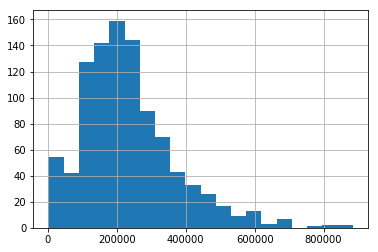

In [13]:
df["price"].hist(bins=20);

In [14]:
# square footage?
df[df["sq__ft"] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [15]:
df[["latitude", "longitude"]].describe()

,latitude,longitude
count,984.000000,984.000000
mean,38.607670,-121.355832
std,0.145494,0.138268
min,38.241514,-121.551704
25%,38.482714,-121.446121
50%,38.626257,-121.376009
75%,38.695611,-121.295557
max,39.020808,-120.597599


### 3 - Our goal will be to predict price. Choose *two* variables that you think might make good predictors of price.

In [16]:
# we'll use square footage and number of beds

### 4 - Based on your answer to 3, explore the relationships between your chosen predictors and the target

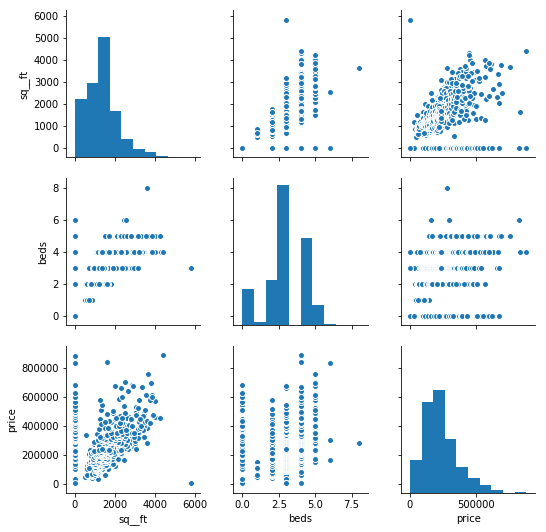

In [17]:
predictors = ["sq__ft", "beds"]
target = ["price"]

# here I'm "adding lists" to make one list of the columns I care about
sns.pairplot(df[predictors + target])

plt.show()

Looks like square footage is correlated with both number of beds and price. Not too surprising!

The relationship between number of beds and price is less clear.

### 5 - Build a linear model using the predictors you chose in question 3.

Make sure to:

- do a train/test split
- fit your model
- evaluate your model (with an appropriate metric)

In [18]:
# train-test split

from sklearn.model_selection import train_test_split

X = df[predictors]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

688 296
688 296


In [19]:
# fit the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# make predictions

y_pred = model.predict(X_test)

In [21]:
# evaluate

from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 97530.5645981
MSE: 16949933488.4
RMSE: 130191.910226


### 6 - Extract the coefficients and the intercept from your model. What is your interpretation of these?

In [22]:
print(model.intercept_, model.coef_)

[ 148545.19189571] [[    21.06696313  19445.23551745]]


*"Starting off with a baseline price of \$148,545 for an empty plot of land with no bedrooms...*

*"For each additional square foot, you get approximately \$21, and \$19,445 for each bedroom (keeping everything else constant)"*

### 7 - What is your interpretation of your chosen error metric?

This particular linear model is \$97,530 wrong on average, or \$130,191 if we punish bigger errors more harshly.

### 8 - Does your model do better than a model that predicts the average price for everything?

In [23]:
# get the mean price
y_mean_price = [y_train.mean()] * len(y_test)

print('RMSE (linear model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE (dumb model):', np.sqrt(metrics.mean_squared_error(y_test, y_mean_price)))

RMSE (linear model): 130191.910226
RMSE (dumb model): 147314.881733


Luckily... yes!

### 9 - If you haven't already, add *type* as an additional predictor, making sure to deal with it accordingly

In [24]:
# it's a categorical variable, so turn it into dummies

# but first, deal with the "Unkown" type

In [25]:
df = df[df["type"] != "Unkown"]

In [26]:
df["type"].value_counts()

Residential     917
Condo            53
Multi-Family     13
Name: type, dtype: int64

In [27]:
# we'll explicitly drop "residential" as a baseline as it's the most common
df_with_dummies = pd.get_dummies(df, columns=["type"], prefix="type").drop("type_Residential", axis=1)
df_with_dummies.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0


In [28]:
# The D.R.Y. principle states: "don't repeat yourself" so let's put the modelling into a function
def fit_linear_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # use zip to merge two lists of the same size into one list of tuples
    # read more here: https://docs.python.org/3/library/functions.html#zip
    
    # a zip object doesn't print, so extract values using a list comprehension
    # read more about list comprehensions here:
    # https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
    print(model.intercept_, [z for z in zip(X.columns, model.coef_)])
    
    return model

fit_linear_model(df_with_dummies[['sq__ft', 'beds', 'type_Condo', 'type_Multi-Family']],
                 df_with_dummies['price'])

MAE: 93870.3260332
RMSE: 127349.685202
151713.521221 [('sq__ft', 33.208694041023783), ('beds', 14399.96049068265), ('type_Condo', -44492.36106336776), ('type_Multi-Family', -58782.449989869638)]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 10 - Reflect on your model. What are some possible issues with the predictors you used?

The RMSE has improved slightly, which means it makes slightly better predictions than before.

The coefficient values have changed. Bedrooms give you *less* uplift in price, where as square feet give *more* than before.

Both Condos and Multi-family houses reduce the price all else being equal, vs. a Residential one.

The only potential issue is some correlations in the dataset.

For example the "type", square footage, and the number of bedrooms are related with one another.

This can mean they are partially masking each other's effects (i.e. the effect of more bedrooms can be at least partly explained by the increase in square feet)

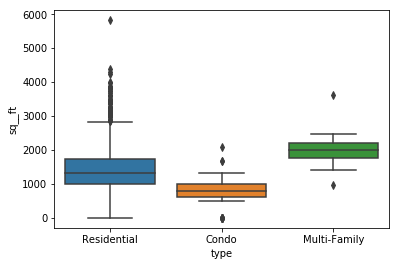

In [29]:
# different types have different square footage on average, so they could be masking each other a bit
sns.boxplot(df["type"], df["sq__ft"]);

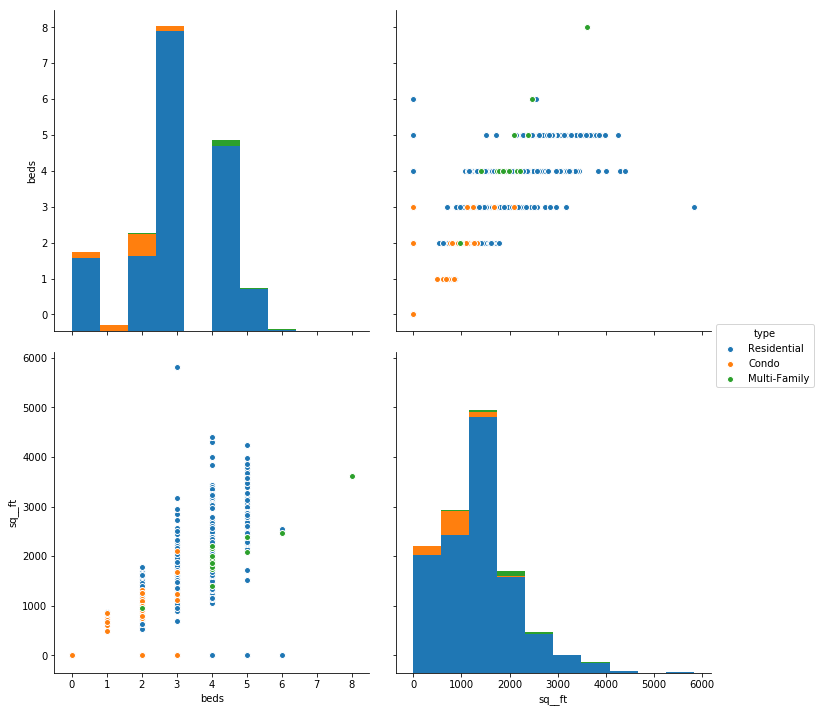

In [30]:
# correlation between beds and square footage, 
# and the difference between condos and multi-family houses
# means that maybe they're all measuring different aspects of "size"
sns.pairplot(df[["beds", "sq__ft", "type"]],
             vars=["beds", "sq__ft"],
             hue="type",
             size=5);